# Objetivo 1

# Autores
David Rodríguez
,    Alejandro Meza

## Índice de la práctica

- [1.Introducción](#1.Introducción)
- [2.Creación de datos](#2.Creación-de-datos)
- [3.Creación de Modelo de Predicción](#3.Creación-de-Modelo-de-Predicción)
- [4.Regresión logística](#4.Regresión-logística)
- [5.SVM](#5.SVM)

In [20]:
import cv2
import glob
import skimage


#Librerias contornos 
import numpy as np
from skimage.io import imread, imshow
from skimage import data, io
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.filters import threshold_otsu 
from skimage.feature import hog
from skimage import data, exposure

#Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris #dataset de prueba
from scipy.optimize import minimize
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm




# 1.Introducción

Para cumplir el objetivo 1, lo hemos dividido en tareas: 

·Creacion de Datos: A partir de las imagenes obtenemos sus caracteristicas

·Creación de Modelo de Predicción: A partir de los datos obtenidos anteriormente, creamos un modelo de predicción.

# 2.Creación de datos

Se va a crear la matriz X, que es la que contiene las imágenes (se crea un dataset).
Creamos metodos que nos ayudaran a conseguir nuestro objetivo.

In [3]:
'''
Descripcion: diccionario con los posibles valores de las imagenes, en relacion con el nombre de las carpetas.
Entrada: -
Salida: diccionario cuyas claves son el nombre de las carpetas, y los valores son el tipo de signals que contiene.
'''
def devolverDiccionarioEtiquetas():
    
    diccionarioValores = {}
    diccionarioValores['00000'] = 'VelocidadMaxima20'
    diccionarioValores['00001'] = 'VelocidadMaxima30'
    diccionarioValores['00002'] = 'VelocidadMaxima50'
    diccionarioValores['00003'] = 'VelocidadMaxima60'
    diccionarioValores['00004'] = 'VelocidadMaxima70'
    diccionarioValores['00005'] = 'VelocidadMaxima80'
    diccionarioValores['00006'] = 'FinVelocidadMaxima80'
    diccionarioValores['00007'] = 'VelocidadMaxima100'
    diccionarioValores['00008'] = 'VelocidadMaxima120'
    diccionarioValores['00009'] = 'AdelantamientoProhibido'
    diccionarioValores['00010'] = 'AdelantamientoProhibidoParaCamiones'

    diccionarioValores['00011'] = 'InterseccionConPrioridad'
    diccionarioValores['00012'] = 'CalzadaConPrioridad'
    diccionarioValores['00013'] = 'CedaElPaso'
    diccionarioValores['00014'] = 'DetencionObligatoria'
    diccionarioValores['00015'] = 'CirculacionProhibida'
    diccionarioValores['00016'] = 'EntradaProhibidaAVehiculosMercancias'
    diccionarioValores['00017'] = 'EntradaProhibida'
    diccionarioValores['00018'] = 'OtrosPeligros'
    diccionarioValores['00019'] = 'CurvaPeligrosaHaciaLaIzquierda'
    diccionarioValores['00020'] = 'CurvaPeligrosaHaciaLaDerecha'

    diccionarioValores['00021'] = 'CurvasPeligrosasHaciaLaIzquierda'
    diccionarioValores['00022'] = 'PerfilIrregular'
    diccionarioValores['00023'] = 'PavimentoDeslizante'
    diccionarioValores['00024'] = 'EstrechamientoCalzadaPorDerecha'
    diccionarioValores['00025'] = 'Obras'
    diccionarioValores['00026'] = 'Semaforos'
    diccionarioValores['00027'] = 'PasoDePeatones'
    diccionarioValores['00028'] = 'Kids'
    diccionarioValores['00029'] = 'EntradaProhibidasCiclos'
    diccionarioValores['00030'] = 'PavimentoDeslizanteNieveHielo'

    diccionarioValores['00031'] = 'PasoDeAnimalesEnLibertad'
    diccionarioValores['00032'] = 'FinDeProhibiciones'
    diccionarioValores['00033'] = 'SentidoObligatorioDerecha'
    diccionarioValores['00034'] = 'SentidoObligatorioIzquierda'
    diccionarioValores['00035'] = 'SentidoObligatorio'
    diccionarioValores['00036'] = 'DirPermitidasRectoYDerecha'
    diccionarioValores['00037'] = 'DirPermitidasRectoEIzquierda'
    diccionarioValores['00038'] = 'PasoObligatorioDerecha'
    diccionarioValores['00039'] = 'PasoObligatorioizquierda'
    diccionarioValores['00040'] = 'InterseccionSentidoObligatorioGiratorio'


    diccionarioValores['00041'] = 'FinProhibicionAdelantamiento'
    diccionarioValores['00042'] = 'FinProhibicionAdelantamientoCamiones'
    
    return diccionarioValores

Probemos ahora el código....

In [4]:
d =  devolverDiccionarioEtiquetas()

for k,v in d.items():
    print(v)

VelocidadMaxima20
VelocidadMaxima30
VelocidadMaxima50
VelocidadMaxima60
VelocidadMaxima70
VelocidadMaxima80
FinVelocidadMaxima80
VelocidadMaxima100
VelocidadMaxima120
AdelantamientoProhibido
AdelantamientoProhibidoParaCamiones
InterseccionConPrioridad
CalzadaConPrioridad
CedaElPaso
DetencionObligatoria
CirculacionProhibida
EntradaProhibidaAVehiculosMercancias
EntradaProhibida
OtrosPeligros
CurvaPeligrosaHaciaLaIzquierda
CurvaPeligrosaHaciaLaDerecha
CurvasPeligrosasHaciaLaIzquierda
PerfilIrregular
PavimentoDeslizante
EstrechamientoCalzadaPorDerecha
Obras
Semaforos
PasoDePeatones
Kids
EntradaProhibidasCiclos
PavimentoDeslizanteNieveHielo
PasoDeAnimalesEnLibertad
FinDeProhibiciones
SentidoObligatorioDerecha
SentidoObligatorioIzquierda
SentidoObligatorio
DirPermitidasRectoYDerecha
DirPermitidasRectoEIzquierda
PasoObligatorioDerecha
PasoObligatorioizquierda
InterseccionSentidoObligatorioGiratorio
FinProhibicionAdelantamiento
FinProhibicionAdelantamientoCamiones


Creamos un diccionario para almacenar todas las fotos, relacionadas a cada señal

In [5]:
'''
Descripcion: diccionario con los posibles valores de las imagenes, en relacion con el nombre de las carpetas.
Entrada: -
Salida: diccionario cuyas claves son el nombre de las carpetas, y los valores son las imagenes de las signals
'''
def crearDiccionarioDatos():
    trafic_signals = {}
    #para cada tipo de señal creamos una lista con sus ejemplos, y se la asignamos a su etiqueta de nombre de carpeta
    for i in range(0,43):
        if i<10:
            folder = 'Dataset_traffic_sign/0000'+str(i)+'/*.png'
            tipo = '0000'+str(i)
        else:
            folder = 'Dataset_traffic_sign/000'+str(i)+'/*.png'
            tipo = '000'+str(i)
        
        images = [cv2.imread(file,0) for file in glob.glob(folder)]
        images_mod = [] 
        for im in images:
            #se aplica el resize
            images_mod.append(cv2.resize(im, (100, 100), interpolation = cv2.INTER_NEAREST))

        trafic_signals[tipo] = images_mod
    return trafic_signals

Creamos funciones para transformar imagenes en descriptores dependiendo del tipo que queramos.
Hay de: HOG, Sift, Surf, Fast_Brief, ORB

In [6]:
# HOG
def hogMaker(images00000_mod):
    fd, hog_image = hog(images00000_mod, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True)
    return fd


# $Sift$
#devuelve descriptor de Sift
def siftMaker(images00000_mod):
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(images00000_mod,None)
    return des


# $Surf$
def surfmaker(images00000_mod):
    surf = cv2.xfeatures2d.SURF_create(400)
    kp, des = surf.detectAndCompute(images00000_mod,None)
    return des

# $Fast$ + $Brief$
def fastbrief_Maker(images00000_mod):
    fast = cv2.FastFeatureDetector_create()

    # find and draw the keypoints
    kp2 = fast.detect(images00000_mod,None)
    img2 = cv2.drawKeypoints(images00000_mod, kp2, None, color=(255,0,0))

    # Disable nonmaxSuppression
    fast.setNonmaxSuppression(0)
    kp3 = fast.detect(img2,None)

    img3 = cv2.drawKeypoints(img2, kp3, None, color=(255,0,0))
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # Compute descriptors
    kp, des = brief.compute(img3, kp3) #fast nonsup
    return des


# $ORB$
def orbMaker(images00000_mod):
    # Initiate ORB detector
    orb = cv2.ORB_create()

    # find the keypoints with ORB
    kp = orb.detect(images00000_mod,None)

    # compute the descriptors with ORB
    kp, des = orb.compute(images00000_mod, kp)
    return des

Cogemos las imagenes y las separamos  en train y test, y decimos a que clase pertenecen

In [7]:
'''
Descripcion: Obtencion de train y test a partir de un conjunto de imágenes
Entrada: trafic_signals, signals_types
Salida: imagenesTrain,imagenesTest,ytrain,ytest
'''
def separaTrainTest(trafic_signals,signals_types):
    imagenesTrain = None
    imagenesTest = None
    ytrain = None
    ytest = None
    
    for signal,images in trafic_signals.items():
        
        aux_y_train = []
        aux_y_test = []
        
        np_im = np.array(images)
        n_train = int(0.6*np_im.shape[0])
        n_test = np_im.shape[0]-n_train
        
        aux_train = np_im[:n_train]
        aux_test = np_im[n_train:]
        
        for i in range(n_train):
            aux_y_train.append(signals_types[signal])
        for i in range(n_test):
            aux_y_test.append(signals_types[signal])
        
        aux_y_train = np.array(aux_y_train).reshape(-1,1)
        aux_y_test = np.array(aux_y_test).reshape(-1,1)
        
        if imagenesTrain is None:
            imagenesTrain = aux_train
            ytrain = aux_y_train
            imagenesTest = aux_test
            ytest = aux_y_test
        else:
            imagenesTrain = np.concatenate((imagenesTrain,aux_train),axis=0)
            ytrain =  np.vstack((ytrain,aux_y_train))
            imagenesTest = np.concatenate((imagenesTest,aux_test),axis=0)
            ytest = np.vstack((ytest,aux_y_test))
        
    return imagenesTrain,imagenesTest,ytrain,ytest

Creamos las caracteristicas con los datos que nos den y sus tipos

In [8]:

def creaMatrizCaracteristicas(imagenes,carac_type, y=None ):
    X = None
    if y is not None:
        y_nueva = []
        
    for i in range(imagenes.shape[0]):
        if carac_type=='sift':
            d = siftMaker(imagenes[i])
        elif carac_type=='surf':
            d = surfmaker(imagenes[i])
        elif carac_type=='fast_brief':
            d = fastbrief_Maker(imagenes[i])
        elif carac_type=='orb':
            d = orbMaker(imagenes[i])
        elif carac_type=='hog':
            d = hogMaker(imagenes[i])
        else: #en caso de recibir un valor que no es valido
            try:
                raise ValueError
            except ValueError:
                print("valor incorrecto")
        
        if d is not None:
            if y is not None:
                y_nueva.append(y[i])
            if X is None:
                X = d
            else:
                X = np.vstack((X,d))
    if y is not None:
        return X, np.array(y_nueva)
    else:
        return X

In [9]:
trafic_signals = crearDiccionarioDatos() #creacion del diccionario de datos
signals_types = devolverDiccionarioEtiquetas() #creacion de diccionario que contiene nombre de carpetas y tipos de signals
carac_type = 'hog' #el tipo elegido para los descriptores va a ser Hog

In [10]:
imagenesTrain,imagenesTest,ytrain,ytest = separaTrainTest(trafic_signals,signals_types)
Xtrain, Ytrain = creaMatrizCaracteristicas(imagenesTrain,carac_type,ytrain)
Xtest, Ytest = creaMatrizCaracteristicas(imagenesTest,carac_type,ytest)

In [11]:
imagenesTrain.shape,imagenesTest.shape,ytrain.shape,ytest.shape

((739, 100, 100), (525, 100, 100), (739, 1), (525, 1))

In [12]:
Xtrain.shape, Ytrain.shape,Xtest.shape, Ytest.shape

((739, 288), (739, 1), (525, 288), (525, 1))

# 3.Creación de Modelo de Predicción

A continuación se implementarán dos modelos de ML como son regresión logísitica y SVM para dar solución al problema.

# 4.Regresión logística

Si 𝑛 es grande (relativo a m), siendo n el número de características y m el número de ejemplos se recomienda usar regresión logística. Como este no es el caso, el resultado que se obtendrá no será el óptimo. Tal como se mostrará a continuación...

In [14]:
# esta funcion nos ayudará a cambiar los valores de Y para la regresion logistica
def transformarY(y, signal):
    aux = np.copy(y)
    Y = np.zeros(y.shape[0]).reshape(-1,1)
    
    Y[aux != np.array([signal])] = 0
    Y[aux == np.array([signal])] = 1
    
    return Y.reshape(-1)

Sacamos para el ejemplo de descriptor los porcentajes de aciertos.

In [15]:
predicctionsTest = []
final_signals = []

for k,s in signals_types.items():
    Ytrain_T = transformarY(Ytrain,s)
    Ytest_T = transformarY(Ytest,s)
    clf = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000).fit(Xtrain, Ytrain_T)
    #prediccionTrain = clf.predict(Xtrain)
    prediccionTest = clf.predict(Xtest)
    #scoreTrain = clf.score(Xtrain, Ytrain_T)
    scoreTest = clf.score(Xtest, Ytest_T)
    
#   print(f"La precision del clasificador en TRAIN: {np.round(scoreTrain,2)} en TEST: {scoreTest} para {s}")
    
#    predicctionsTrain.append(np.round(scoreTrain,2))
    predicctionsTest.append(np.round(scoreTest,2))
    final_signals.append(s)

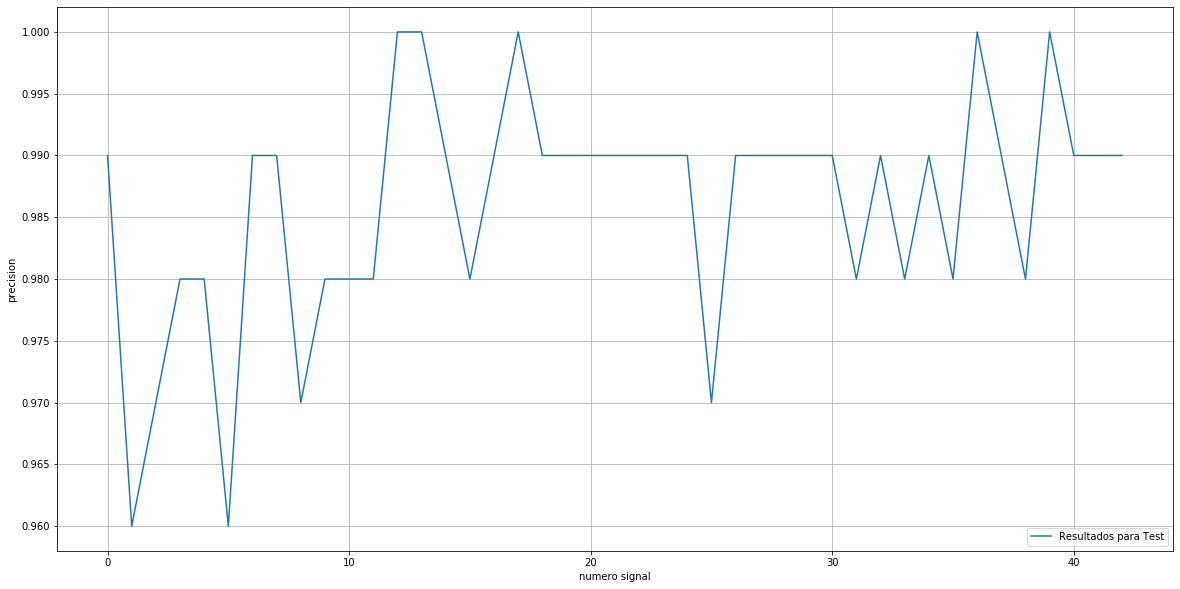

In [16]:
sig = np.arange(len(final_signals))
plt.figure(figsize=(20,10))
#plt.plot(sig,predicctionsTrain,label='Resultados para Train')
plt.plot(sig,predicctionsTest,label='Resultados para Test')
plt.xlabel('numero signal')
plt.ylabel('precision')
plt.grid()
plt.legend(loc=4)
plt.show()

In [17]:
# funcion que no ayudará a cambiar de un numero a el string correspondiente relacionado a la señal
def deNumeroASignal(num):
    if num<10:
        tipo = '0000'+str(num)
    else:
        tipo = '000'+str(num)
    return tipo

Probado el ejemplo. Entrenamos para los diferentes tipos de descripciones y escogemos el mejor

In [18]:
def getSignalsLogPredicction(Xtrain,Ytrain,signals_types,carac_type):
        
    predicctionsTrain = []
    final_signals = []
    modelos = []

    for k,s in signals_types.items():
        Ytrain_T = transformarY(Ytrain,s)
        if not(np.any(Ytrain_T==1)):
            predicctionsTrain.append(0)
            final_signals.append(s)
            modelos.append(None)
        else:
            clf = LogisticRegression(random_state=0,solver='lbfgs',max_iter=10000).fit(Xtrain, Ytrain_T)
            prediccionTrain = clf.predict(Xtrain)
            scoreTrain = clf.score(Xtrain, Ytrain_T)
            predicctionsTrain.append((scoreTrain))
            final_signals.append(s)
            modelos.append(clf)
    
    predMediaTrain = sum(predicctionsTrain)/len(predicctionsTrain)
    
    print(f'Prediccion media TRAIN: {predMediaTrain} para {carac_type}')
    
    return modelos,predMediaTrain,np.array(predicctionsTrain)

In [19]:
typeDescriptors = ['hog']# Se le podria pasar todo esto: ['sift','surf','fast_brief','orb','hog']
trafic_signals = crearDiccionarioDatos()
signals_types = devolverDiccionarioEtiquetas()
bestypeDes = None
Modelos = None
bestXtest = None
bestYtrain = None
bestPrediccionTrain = 0
prediccionesPorSignal = None

for carac_type in typeDescriptors:
    
    Xtrain,Ytrain = creaMatrizCaracteristicas(imagenesTrain,carac_type,ytrain)
    
    modelos, prediccionTrain, predicctionsTrain = getSignalsLogPredicction(Xtrain,Ytrain,signals_types,carac_type)
    
    if bestPrediccionTrain < prediccionTrain:
        Modelos = modelos
        bestypeDes = carac_type
        prediccionesPorSignal = predicctionsTrain

Prediccion media TRAIN: 0.9928249992132681 para hog


Ahora probamos el modelo con las imagenes separadas para el test.

Probamos primero con una imagen.

In [20]:
def probarClasificador(n,Modelos, imagenesTrain,bestypeDes,signals_types):
    plt.figure()
    plt.imshow(imagenesTrain[n])
    plt.show()

    y_imagen = np.zeros(len(Modelos))

    #transformar imagen en des
    d = creaMatrizCaracteristicas(np.array([imagenesTrain[n]]), bestypeDes)
    d = np.array(d).reshape(1,-1)

    # predecir des
    ii = 0
    for m in Modelos:
        if m is not None:
            y_imagen[ii] = m.predict(d)
            ii+=1

    #sacar resultado
    pred = np.argwhere(y_imagen==1)
    if pred.size>1:
        a = deNumeroASignal(pred[np.argmax(prediccionesPorSignal[pred])])
        print(signals_types[a])
    elif pred.size == 1:
        a = deNumeroASignal(pred[0][0])
        print(signals_types[a])

--------------------------------------------------------------------------
Introduce el numero de imagen que quieras clasificar: 61
Tu imagen a clasificar es la numero 61
--------------------------------------------------------------------------


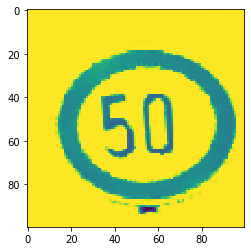

VelocidadMaxima50


In [21]:
print("--------------------------------------------------------------------------")
n  = (int)(input("Introduce el numero de imagen que quieras clasificar: "))
print(f"Tu imagen a clasificar es la numero {n}")
print("--------------------------------------------------------------------------")

probarClasificador(n,Modelos, imagenesTrain,bestypeDes,signals_types)

Veamos pues,  la tasa de acierto de predicciones con las imagenes separadas para TEST con el mejor tipo de descriptor (todo el conjunto)

In [22]:

prediccionTestmatriz =  np.zeros((Xtest.shape[0], len(modelos)))

contador = 0
for modelo in Modelos:
    prediccionTest = modelo.predict(Xtest)
#     print(prediccionTest.shape)
    prediccionTestmatriz[:,contador] = prediccionTest
    contador += 1
    
print(f"La prediccion media de test tiene un acierto del {sum(predicctionsTest)/(len(predicctionsTest))}")

La prediccion media de test tiene un acierto del 0.9860465116279066


In [23]:
prediccionTestmatriz.shape

(525, 43)

In [24]:
np.any(prediccionTestmatriz==1,axis=0) 

array([False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False, False,  True,
        True, False,  True,  True, False, False, False])

In [25]:
prediccionesPorSignal

array([0.99594046, 0.98511502, 0.97834912, 0.98105548, 0.9932341 ,
       0.96887686, 0.9932341 , 0.9932341 , 0.98511502, 0.99052774,
       0.9932341 , 0.9932341 , 1.        , 1.        , 0.99594046,
       0.99052774, 0.99458728, 1.        , 0.99458728, 0.99594046,
       0.99729364, 0.9932341 , 0.9932341 , 0.98782138, 0.99458728,
       0.9864682 , 0.99052774, 0.99458728, 0.99052774, 0.99458728,
       0.99052774, 0.99594046, 1.        , 0.99594046, 0.99458728,
       0.99864682, 0.99594046, 0.99594046, 1.        , 0.99594046,
       0.99188092, 0.99594046, 0.99458728])

Es un resultado bastante optimista, probamos a analizar la tasa de acierto de otra manera

In [26]:
prediccionTestmatriz

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

$Debido$ $a$ $problemas$ $técnicos$ que desconocemos, nos hemos visto forzados a poner una imagen con el resultado obtenido de la versión anterior, para demostrar que el porcentaje de aciertos en test es realmente bajo

In [13]:
problematecnico = cv2.imread('ResultadoRegresionLogistica.png')
cv2.imshow('resultadoRegLogistica',problematecnico)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:

'''
filas = prediccionTestmatriz.shape[0]
soluciones = [] #lista de soluciones que se han predicho

for i in range(filas):
    aux = prediccionTestmatriz[i,:] #se obtiene la fila de la matriz
    #ERROR ESTA AQUI!!!
    posicionesUnos = (np.where(aux==1)[0]) #se obtienen las posiciones unos
    signalPredicha = (np.argmax(prediccionesPorSignal[posicionesUnos]))
    nombreSignals= deNumeroASignal(posicionesUnos[signalPredicha])
    soluciones.append(signals_types[nombreSignals])
    
    
ytestComparar = list(ytest)


aciertos =  0
for i in range(len(ytestComparar)):
    if ytestComparar[i] == soluciones[i]:
        aciertos+=1
        
porcentajeAciertos = ( aciertos/(len(soluciones)) )*100
print(f"El porcentaje de aciertos es {porcentajeAciertos}")


'''

'\nfilas = prediccionTestmatriz.shape[0]\nsoluciones = [] #lista de soluciones que se han predicho\n\nfor i in range(filas):\n    aux = prediccionTestmatriz[i,:] #se obtiene la fila de la matriz\n    #ERROR ESTA AQUI!!!\n    posicionesUnos = (np.where(aux==1)[0]) #se obtienen las posiciones unos\n    signalPredicha = (np.argmax(prediccionesPorSignal[posicionesUnos]))\n    nombreSignals= deNumeroASignal(posicionesUnos[signalPredicha])\n    soluciones.append(signals_types[nombreSignals])\n    \n    \nytestComparar = list(ytest)\n\n\naciertos =  0\nfor i in range(len(ytestComparar)):\n    if ytestComparar[i] == soluciones[i]:\n        aciertos+=1\n        \nporcentajeAciertos = ( aciertos/(len(soluciones)) )*100\nprint(f"El porcentaje de aciertos es {porcentajeAciertos}")\n\n\n'

Vemos que el resultado no es tan bueno como imaginabamos. 

# 5.SVM

Las máquinas de vectores de soporte o máquinas de vector soporte (del inglés Support Vector Machines, SVM) son un conjunto de algoritmos de aprendizaje supervisado desarrollados por Vladimir Vapnik y su equipo en los laboratorios AT&T.

Estos métodos están propiamente relacionados con problemas de clasificación y regresión. Dado un conjunto de ejemplos de entrenamiento (de muestras) podemos etiquetar las clases y entrenar una SVM para construir un modelo que prediga la clase de una nueva muestra.

$Idea$:

Dado un conjunto de puntos, subconjunto de un conjunto mayor (espacio), en el que cada uno de ellos pertenece a una de dos posibles categorías, un algoritmo basado en SVM construye un modelo capaz de predecir si un punto nuevo (cuya categoría desconocemos) pertenece a una categoría o a la otra.

Como en la mayoría de los métodos de clasificación supervisada, los datos de entrada (los puntos) son vistos como un vector p-dimensional (una lista ordenada de p números).

La SVM busca un hiperplano que separe de forma óptima a los puntos de una clase de la de otra, que eventualmente han podido ser previamente proyectados a un espacio de dimensionalidad superior.

In [15]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(Xtrain, ytrain.ravel())
y_pred = clf.predict(Xtest)
print("Classification report for - \n{}:\n{}\n".format(clf, metrics.classification_report(ytest.ravel(), y_pred)))

C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Classification report for - 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
                                         precision    recall  f1-score   support

                AdelantamientoProhibido       0.80      1.00      0.89        20
    AdelantamientoProhibidoParaCamione

C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


De manera manual vemos la tasa de acierto y comparamos.

In [16]:
ytestCompararSVM = (y_pred)

aciertosSVM =  0
for i in range(len(ytestCompararSVM)):
    if ytestCompararSVM[i] == ytest[i]:
        aciertosSVM+=1
        
porcentajeAciertosSVM = ( aciertosSVM/(len(ytestCompararSVM)) )*100
print(f"El porcentaje de aciertos es {porcentajeAciertosSVM}%")

El porcentaje de aciertos es 83.23809523809523%


Vemos que es lo que decia en los datos como "accuracy"

In [17]:
def predecirImagenSVM(imagen,carac_type,clf):
    #transformar imagen en des
    d = creaMatrizCaracteristicas(np.array([imagen]), carac_type)
    d = np.array(d).reshape(1,-1)
    return clf.predict(d)

Probamos con un ejemplo

¿Desea probar el clasificador? (si/no)si
Introduce un numero de imagen para probar: 56
Tu numero de imagen para probar es la numero 56


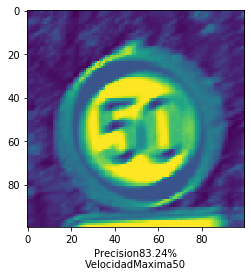

¿Desea seguir probando el clasificador? (si/no)no
Hasta la proxima!!


In [18]:
#pequeña celda para interactuar con el clasificador

caracter = input("¿Desea probar el clasificador? (si/no)")

if caracter == "no":
    print("Hasta la proxima!!")
elif caracter == "si":
    while(caracter == "si"):
        numeroImagen = (int)(input("Introduce un numero de imagen para probar: "))
        print(f"Tu numero de imagen para probar es la numero {numeroImagen}")
        res = predecirImagenSVM(imagenesTest[numeroImagen],carac_type,clf)
        plt.figure()
        plt.imshow(imagenesTest[numeroImagen])
        lab = 'Precision' + str(np.round(porcentajeAciertosSVM,2))+'%\n'+ res[0]
        plt.xlabel(lab)
        plt.show()
        caracter = input("¿Desea seguir probando el clasificador? (si/no)")
        if caracter == "no":
            print("Hasta la proxima!!")
            break

Para finalizar, guiados por la tasa superior de aciertos, escogemos las SVMs como modelo de predicción para este proyecto.

# Preprocesamiento de imagen

Se procede a realizar un suavizado gaussiano sobre las imágenes. Se estudiará si dicho preprocesamiento puede dar lugar a mejores resultados.

Creamos que influirá de manera significativa el size de la ventana, por ello iremos probando con una distintos valores. 


In [21]:
n = [3,5,7,9,11] #lista con los valores a probar
best_n = 0
best_accuracy = 0
best_clf_GK = None

#iteramos sobre la lista de los valores de las ventanas
for v in n:   
    imagenesTrain_GK = np.zeros(imagenesTrain.shape)
    for i in range(imagenesTrain.shape[0]):
        imagenesTrain_GK[i] = cv2.GaussianBlur(imagenesTrain[i],(v,v),cv2.BORDER_REPLICATE)

    imagenesTest_GK = np.zeros(imagenesTest.shape)
    for i in range(imagenesTest.shape[0]):
        imagenesTest_GK[i] =  cv2.GaussianBlur(imagenesTest[i],(v,v),cv2.BORDER_REPLICATE)

    Xtrain_GK, Ytrain = creaMatrizCaracteristicas(imagenesTrain_GK,carac_type,ytrain)
    Xtest_GK, Ytest = creaMatrizCaracteristicas(imagenesTest_GK,carac_type,ytest)
    
    param_grid = [
      {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
      {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
    svc = svm.SVC()
    clf_GK = GridSearchCV(svc, param_grid)
    clf_GK.fit(Xtrain_GK, Ytrain.ravel())
    y_pred = clf_GK.predict(Xtest_GK)
    print("Classification report for - \n{}:\n{}\n".format(clf_GK, metrics.classification_report(Ytest.ravel(), y_pred)))
    accuracy = accuracy_score(Ytest, y_pred)
    print(f'n = {v} accuracy = {accuracy}')
    if best_accuracy<accuracy:
        best_accuracy = accuracy
        best_n = v
        best_clf_GK = clf_GK

C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report for - 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
                                         precision    recall  f1-score   support

                AdelantamientoProhibido       0.90      0.95      0.93        20
    AdelantamientoProhibidoParaCamione

C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Classification report for - 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
                                         precision    recall  f1-score   support

                AdelantamientoProhibido       0.95      0.90      0.92        20
    AdelantamientoProhibidoParaCamione

C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Classification report for - 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
                                         precision    recall  f1-score   support

                AdelantamientoProhibido       1.00      0.95      0.97        20
    AdelantamientoProhibidoParaCamione

C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Classification report for - 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
                                         precision    recall  f1-score   support

                AdelantamientoProhibido       1.00      0.95      0.97        20
    AdelantamientoProhibidoParaCamione

C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\alemt\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Classification report for - 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
                                         precision    recall  f1-score   support

                AdelantamientoProhibido       1.00      0.95      0.97        20
    AdelantamientoProhibidoParaCamione

In [22]:
print(f"El mejor valor de ventana es { best_n}")

El mejor valor de ventana es 7


In [23]:

imagenesTrain_GK = np.zeros(imagenesTrain.shape)
for i in range(imagenesTrain.shape[0]):
    imagenesTrain_GK[i] = cv2.GaussianBlur(imagenesTrain[i],( best_n, best_n),cv2.BORDER_REPLICATE)


imagenesTest_GK = np.zeros(imagenesTest.shape)
for i in range(imagenesTest.shape[0]):
    imagenesTest_GK[i] =  cv2.GaussianBlur(imagenesTest[i],( best_n, best_n),cv2.BORDER_REPLICATE)
    
Xtrain_GK, Ytrain = creaMatrizCaracteristicas(imagenesTrain_GK,carac_type,ytrain)
Xtest_GK, Ytest = creaMatrizCaracteristicas(imagenesTest_GK,carac_type,ytest)

¿Desea probar el clasificador? (si/no)si
Introduce un numero de imagen para probar: 56
Tu numero de imagen para probar es la numero 56


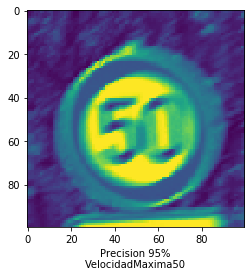

In [ ]:
#pequeña celda para interactuar con el clasificador

caracter = input("¿Desea probar el clasificador? (si/no)")

if caracter == "no":
    print("Hasta la proxima!!")
elif caracter == "si":
    while(caracter == "si"):
        numeroImagen = (int)(input("Introduce un numero de imagen para probar: "))
        print(f"Tu numero de imagen para probar es la numero {numeroImagen}")
        res = predecirImagenSVM(imagenesTest_GK[numeroImagen],carac_type,best_clf_GK)
        plt.figure()
        plt.imshow(imagenesTest[numeroImagen])
        lab = 'Precision 95%\n'+ res[0]
        plt.xlabel(lab)
        plt.show()
        caracter = input("¿Desea seguir probando el clasificador? (si/no)")
        if caracter == "no":
            print("Hasta la proxima!!")
            break

# ECUALIZACION

In [62]:
#bins contiene el indice de los elementos del histograma
def ecualizacion_v3(imagen,h):
    aux= np.copy(imagen) #se copia la imagen
    rows, columns = imagen.shape
    h = h/(rows * columns)
    h = np.cumsum(h) #maravillosa jugada
    aux =np.uint8(255 *  h[(aux)+1])
    return aux

In [63]:

imagenesTrain_E = np.zeros(imagenesTrain.shape)
for i in range(imagenesTrain.shape[0]):
    h, bins = np.histogram(imagenesTrain[i], bins = 256, range = [0,256])
    imagenesTrain_E[i] = ecualizacion_v3(imagenesTrain[i],h)

imagenesTest_E = np.zeros(imagenesTest.shape)
for i in range(imagenesTest.shape[0]):
    h, bins = np.histogram(imagenesTest[i], bins = 256, range = [0,256])
    imagenesTest_E[i] = ecualizacion_v3(imagenesTest[i],h)
    
Xtrain_E, Ytrain = creaMatrizCaracteristicas(imagenesTrain_E,carac_type,ytrain)
Xtest_E, Ytest = creaMatrizCaracteristicas(imagenesTest_E,carac_type,ytest)

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
svc = svm.SVC()
clf_E = GridSearchCV(svc, param_grid)
clf_E.fit(Xtrain_E, Ytrain.ravel())
y_pred = clf_E.predict(Xtest_E)
print("Classification report for - \n{}:\n{}\n".format(clf_E, metrics.classification_report(Ytest.ravel(), y_pred)))
print(accuracy_score(Ytest, y_pred))

C:\Users\daviz\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}]):
                                         precision    recall  f1-score   support

                AdelantamientoProhibido       0.78      0.90      0.84        20
    AdelantamientoProhibidoParaCamiones       0.89      0.89      0.89        27
                    CalzadaConPrioridad       0.97      1.00      0.98        28
                             CedaElPaso       1.00      1.00      1.00        29
                   CirculacionProhibida       0.88      0.88      0.88         8
           CurvaPeligrosaHaciaLaDerecha       0.33      0.40      0.36         5
         CurvaPeligrosaHaciaLaIzquierda       0.00      0.00      0.00         3
       CurvasPeligrosasHaciaLaIzquierda       0.80      1.00      0.89         4
            

C:\Users\daviz\anaconda3\envs\py37vision\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# UMBRALIZACION

In [64]:
import skimage
from skimage import data, io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from skimage.filters import threshold_otsu 

In [65]:
imagenesTrain_Otsu = np.zeros(imagenesTrain.shape)
for i in range(imagenesTrain.shape[0]):
    threshold_value = threshold_otsu(imagenesTrain[i])
    camera_threholded = imagenesTrain[i] > threshold_value
    imagenesTrain_Otsu[i] = camera_threholded*255

imagenesTest_Otsu = np.zeros(imagenesTest.shape)
for i in range(imagenesTest.shape[0]):
    threshold_value = threshold_otsu(imagenesTest[i])
    camera_threholded = imagenesTest[i] > threshold_value
    imagenesTest_Otsu[i] = camera_threholded*255
    
Xtrain_Otsu, Ytrain = creaMatrizCaracteristicas(imagenesTrain_Otsu,carac_type,ytrain)
Xtest_Otsu, Ytest = creaMatrizCaracteristicas(imagenesTest_Otsu,carac_type,ytest)

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},]
svc = svm.SVC()
clf_Otsu = GridSearchCV(svc, param_grid)
clf_Otsu.fit(Xtrain_Otsu, Ytrain.ravel())
y_pred = clf_Otsu.predict(Xtest_Otsu)
print("Classification report for - \n{}:\n{}\n".format(clf_Otsu, metrics.classification_report(Ytest.ravel(), y_pred)))
print(accuracy_score(Ytest, y_pred))

C:\Users\daviz\anaconda3\envs\py37vision\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}]):
                                         precision    recall  f1-score   support

                AdelantamientoProhibido       0.40      0.50      0.44        20
    AdelantamientoProhibidoParaCamiones       0.37      0.48      0.42        27
                    CalzadaConPrioridad       0.79      0.82      0.81        28
                             CedaElPaso       0.96      0.90      0.93        29
                   CirculacionProhibida       0.40      0.25      0.31         8
           CurvaPeligrosaHaciaLaDerecha       0.12      0.20      0.15         5
         CurvaPeligrosaHaciaLaIzquierda       0.00      0.00      0.00         3
       CurvasPeligrosasHaciaLaIzquierda       0.00      0.00      0.00         4
            

C:\Users\daviz\anaconda3\envs\py37vision\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resumen:
    Vamos a utilizar un suavizado gaussiano.